## **Emotion Detection For Both Text and Image using LogisticRegression For Mental Awareness**

## Data Preprocessing.
o	Import the Libraries.

o	Importing the dataset.

o	Checking for Null Values.

o	Data Visualization.

o	Outlier Detection

o	Splitting Dependent and Independent variables

o Encoding

o	Feature Scaling.

o	Splitting Data into Train and Test.

# Import the Libraries.

In [ ]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.9 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Importing the dataset

In [ ]:
df = pd.read_csv("/content/emotion_dataset.csv")

In [ ]:
df

,S.no,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
df.shape

(34792, 4)

In [ ]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   S.no        34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,S.no
count,34792.000000
mean,17395.500000
std,10043.729619
min,0.000000
25%,8697.750000
50%,17395.500000
75%,26093.250000
max,34791.000000


In [ ]:
#Checking for Null Values.
df.isnull().any()

S.no          False
Emotion       False
Text          False
Clean_Text     True
dtype: bool

In [ ]:
df.isnull().sum()

S.no            0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

#Data Visualization.

<Axes: xlabel='Emotion', ylabel='count'>

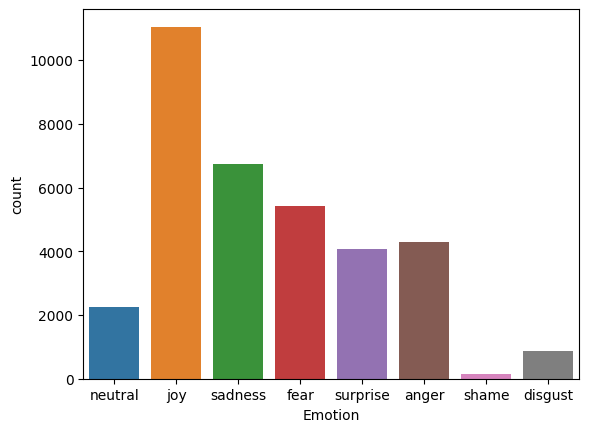

In [ ]:
sns.countplot(x='Emotion',data=df)

In [ ]:
df.corr()


<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,S.no
S.no,1.0


In [ ]:
df.head()

,S.no,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


<ipython-input-14-a7d86d130b89>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-14-a7d86d130b89>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(emotions.corr(), annot=True)


<Axes: >

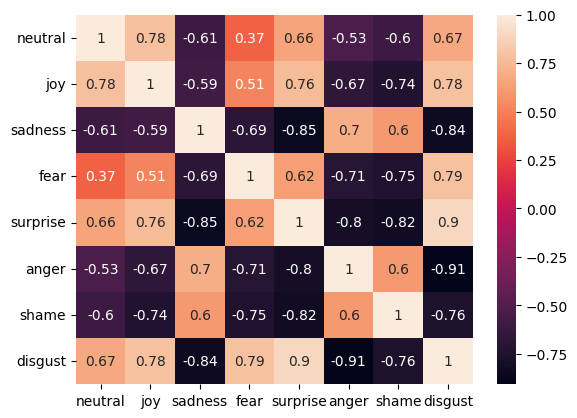

In [ ]:
df = pd.DataFrame({'Emotion': ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust'],
                   'neutral': [1, 0.5, -0.2, 0.1, 0.3, -0.1, -0.2, 0.4],
                   'joy': [0.5, 1, -0.1, 0.2, 0.4, -0.2, -0.3, 0.5],
                   'sadness': [-0.2, -0.1, 1, -0.3, -0.5, 0.3, 0.2, -0.4],
                   'fear': [0.1, 0.2, -0.3, 1, 0.2, -0.3, -0.4, 0.5],
                   'surprise': [0.3, 0.4, -0.5, 0.2, 1, -0.4, -0.5, 0.6],
                   'anger': [-0.1, -0.2, 0.3, -0.3, -0.4, 1, 0.2, -0.5],
                   'shame': [-0.2, -0.3, 0.2, -0.4, -0.5, 0.2, 1, -0.3],
                   'disgust': [0.4, 0.5, -0.4, 0.5, 0.6, -0.5, -0.3, 1]})
corr = df.corr()
emotions = df[['Emotion', 'neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']]
sns.heatmap(emotions.corr(), annot=True)

<Axes: xlabel='Emotion_encoded', ylabel='Emotion'>

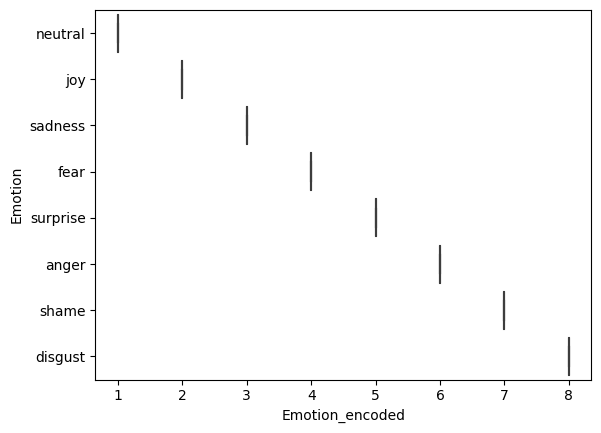

In [ ]:
df = pd.DataFrame({'Emotion': ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']})
df['Emotion_encoded'] = df['Emotion'].map({'neutral': 1, 'joy': 2, 'sadness': 3, 'fear': 4, 'surprise': 5, 'anger': 6, 'shame': 7, 'disgust': 8})
sns.boxplot(x='Emotion_encoded', y='Emotion', data=df)


In [ ]:
#Splitting Dependent and Independent variables
x=df.iloc[:,1:9]
x.head()

,Emotion_encoded
0,1
1,2
2,3
3,4
4,5


In [ ]:
df

,Emotion,Emotion_encoded
0,neutral,1
1,joy,2
2,sadness,3
3,fear,4
4,surprise,5
5,anger,6
6,shame,7
7,disgust,8


# • Model Building
o	Import the model building Libraries

o	Initializing the model

o	Training and testing the model

o	Evaluation of Model

o	Save the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred

array(['joy', 'fear', 'sadness', ..., 'fear', 'surprise', 'anger'],
      dtype='<U8')

In [ ]:
X_test

<8699x75685 sparse matrix of type '<class 'numpy.float64'>'
	with 137665 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

['joy',
 'fear',
 'sadness',
 'surprise',
 'disgust',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'surprise',
 'joy',
 'surprise',
 'joy',
 'joy',
 'surprise',
 'joy',
 'joy',
 'joy',
 'fear',
 'joy',
 'surprise',
 'surprise',
 'joy',
 'fear',
 'joy',
 'joy',
 'joy',
 'neutral',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'joy',
 'joy',
 'fear',
 'sadness',
 'surprise',
 'sadness',
 'fear',
 'sadness',
 'joy',
 'joy',
 'fear',
 'joy',
 'disgust',
 'joy',
 'neutral',
 'surprise',
 'sadness',
 'neutral',
 'fear',
 'sadness',
 'joy',
 'joy',
 'joy',
 'sadness',
 'disgust',
 'joy',
 'shame',
 'fear',
 'fear',
 'sadness',
 'anger',
 'anger',
 'joy',
 'fear',
 'anger',
 'sadness',
 'anger',
 'anger',
 'neutral',
 'joy',
 'anger',
 'anger',
 'joy',
 'fear',
 'anger',
 'anger',
 'fear',
 'joy',
 'joy',
 'fear',
 'joy',
 'fear',
 'joy',
 'joy',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'fear',
 'fear',
 'sadness',
 '

# Evaluation of classification model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
confusion_matrix(y_test,pred)

array([[1035,    1,    3,    1,    0,    7,    0,    0],
       [   0,  207,    1,    4,    0,    0,    0,    0],
       [   1,    0, 1332,    1,    1,    0,    0,    2],
       [   3,    1,    5, 2734,    1,    1,    0,    6],
       [   0,    0,    3,    7,  565,    1,    0,    0],
       [   4,    0,    6,    2,    0, 1675,    0,    2],
       [   1,    0,    2,    7,    0,    5,   19,    0],
       [   1,    0,    1,    1,    0,    0,    0, 1050]])

In [ ]:
accuracy_score(y_test,pred)

0.9905736291527761

In [ ]:
pd.crosstab(y_test,pred)

col_0,anger,disgust,fear,joy,neutral,sadness,shame,surprise
row_0,,,,,,,,
anger,1035,1,3,1,0,7,0,0
disgust,0,207,1,4,0,0,0,0
fear,1,0,1332,1,1,0,0,2
joy,3,1,5,2734,1,1,0,6
neutral,0,0,3,7,565,1,0,0
sadness,4,0,6,2,0,1675,0,2
shame,1,0,2,7,0,5,19,0
surprise,1,0,1,1,0,0,0,1050


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      1047
     disgust       0.99      0.98      0.98       212
        fear       0.98      1.00      0.99      1337
         joy       0.99      0.99      0.99      2751
     neutral       1.00      0.98      0.99       576
     sadness       0.99      0.99      0.99      1689
       shame       1.00      0.56      0.72        34
    surprise       0.99      1.00      0.99      1053

    accuracy                           0.99      8699
   macro avg       0.99      0.94      0.96      8699
weighted avg       0.99      0.99      0.99      8699



# Implemention of Model For Text

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on new data
new_text = "Iam mad at you"
X_new = vectorizer.transform([new_text])
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
print("Predicted emotion:", y_pred_new[0])





Accuracy: 0.9905736291527761
Predicted emotion: anger


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# With Text - Neutral, Joy, Sadness

In [ ]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Define paths for text files corresponding to each emotion
sadness_path = "/content/sadness.txt"
joy_path = "/content/joy.txt"
neutral_path = "/content/neutral.txt"

# Determine the corresponding text file based on the predicted emotion
if predicted_emotion == "sadness":
    text_file_path = sadness_path
elif predicted_emotion == "joy":
    text_file_path = joy_path
else:
    text_file_path = neutral_path

# Read the corresponding text file
with open(text_file_path, "r") as f:
    text_content = f.read()

# Print the corresponding text file content
print("Quotes :")
print(text_content)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9925278767674446
Enter the text: How are you 
Predicted emotion: neutral
Quotes :
"Some people dream of success, while other people get up every morning and make it happen." —Wayne Huizenga
“Each morning we are born again. What we do today is what matters most.” —Buddha
"There is a morning inside you waiting to burst open into light." —Rumi
"Every morning is a beautiful morning." —Terri Guillemets
"Spread love everywhere you go. Let no one ever come to you without leaving happier". -Mother Teresa
"The best and most beautiful things in the world cannot be seen or even touched - they must be felt with the heart."-Helen Keller



# With Image

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/archive (3)'

# Define the emotions we want to recognize
emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1. / 255)

# Generate batches of images for training
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=emotions
)

# Print the emotions in the dataset
print(train_generator.class_indices)


Found 12180 images belonging to 7 classes.
{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}


Found 12180 images belonging to 7 classes.


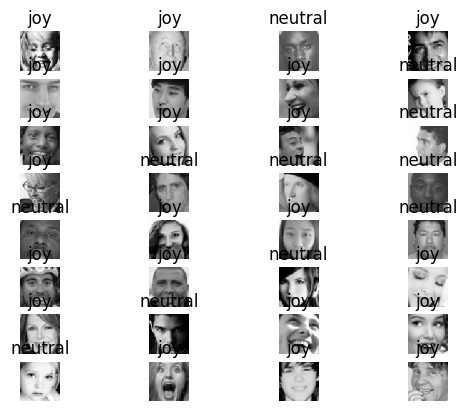

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/archive (3)'

# Define the emotions we want to recognize
emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1. / 255)

# Generate batches of images for training
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=emotions
)

# Get a batch of images
images, labels = train_generator.next()

# Display the images
for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(emotions[np.argmax(labels[i])])
    plt.axis('off')

plt.show()

In [ ]:
import random

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9911484078629728
Enter the text: I won fifty million
Predicted emotion: joy
Image data path: /content/drive/MyDrive/archive (3)/test/joy/im1756.png


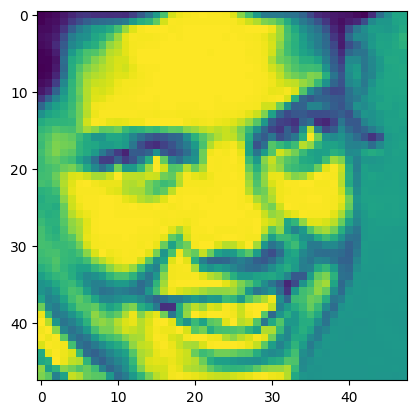

In [ ]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
  label = line.split(",")[1]
  y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the image data path
print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()




# With Image and text

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9909184963788942
Enter the text: I had a lovely surprise when I saw Mark there
Predicted emotion: surprise
Image data path: /content/drive/MyDrive/archive (3)/test/surprise/im713.png
Text data path: /content/neutral.txt


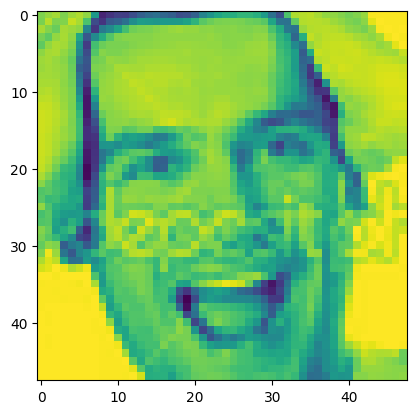

Quotes :
"Some people dream of success, while other people get up every morning and make it happen." —Wayne Huizenga
“Each morning we are born again. What we do today is what matters most.” —Buddha
"There is a morning inside you waiting to burst open into light." —Rumi
"Every morning is a beautiful morning." —Terri Guillemets
"Spread love everywhere you go. Let no one ever come to you without leaving happier". -Mother Teresa
"The best and most beautiful things in the world cannot be seen or even touched - they must be felt with the heart."-Helen Keller



In [ ]:
import random
import os
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define paths for text files corresponding to each emotion
sadness_text_path = "/content/sadness.txt"
joy_text_path = "/content/joy.txt"
neutral_text_path = "/content/neutral.txt"

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
  label = line.split(",")[1]
  y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "sadness":
  text_file_path = sadness_text_path
elif predicted_emotion == "joy":
  text_file_path = joy_text_path
else:
  text_file_path = neutral_text_path

print("Image data path:", image_file_path)

if text_file_path:
  print("Text data path:", text_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
  with open(text_file_path, "r") as f:
    text_content = f.read()

  # Print the corresponding text file content
  print("Quotes :")
  print(text_content)


# With the help of Sentiment Analyzer with extra parameter-Anger and Fear

In [ ]:
import nltk


In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: I won fifty million
Predicted emotion: joy
Text data path: /content/joy.txt
Image data path: /content/drive/MyDrive/archive (3)/test/joy/im615.png


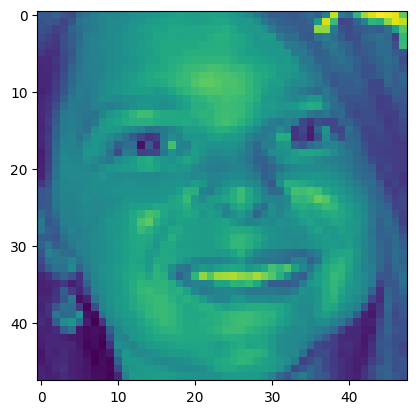

Quotes :
Books:
"The House in the Cerulean Sea" by T.J. Klune: This heartwarming fantasy novel tells the story of Linus Baker, a caseworker who is sent to investigate a remote orphanage that houses six magical children. Linus quickly learns that the children are not dangerous and that the orphanage is a place of love and acceptance. 
"Eleanor Oliphant is Completely Fine" by Gail Honeyman: This charming novel tells the story of Eleanor Oliphant, a socially awkward and reclusive woman who learns to open up to others and find joy in life. "A Man Called Ove" by Fredrik Backman: This heartwarming novel tells the story of Ove, a grumpy old man who learns to let go of his anger and embrace life after he befriends a young family who moves in next door. 
"The Secret Life of Bees" by Sue Monk Kidd: This historical fiction novel tells the story of Lily Owens, a young girl who runs away from home in 1964 and finds refuge with a trio of black beekeepers. 
"The Book Thief" by Markus Zusak: This hist

In [ ]:
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Define paths for text files corresponding to each emotion
sadness_text_path = "/content/sadness.txt"
joy_text_path = "/content/joy.txt"
neutral_text_path = "/content/neutral.txt"

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
  label = line.split(",")[1]
  y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "sadness":
  text_file_path = sadness_text_path
elif predicted_emotion == "joy":
  text_file_path = joy_text_path
else:
  text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "sadness":
  print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
  print("Text data path:", joy_text_path)
else:
  print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
  with open(text_file_path, "r") as f:
    text_content = f.read()

  # Print the corresponding text file content
  print("Quotes :")
  print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "sadness" and compound_sentiment < 0:
  print("- Practice relaxation techniques like deep breathing or meditation.")
  print("- Engage in activities that bring you joy.")
  print("- Seek support from friends, family, or a therapist.")
elif predicted_emotion == "joy" and compound_sentiment > 0:
  print("- Continue to engage in activities that bring you happiness.")
  print("- Share your positive experiences with others.")
  print("- Practice gratitude for the good things in your life.")
else:
  print("- Engage in activities that promote mindfulness and self-awareness.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: i u will have good day
Predicted emotion: joy
Text data path: /content/joy.txt
Image data path: /content/drive/MyDrive/archive (3)/test/joy/im60.png


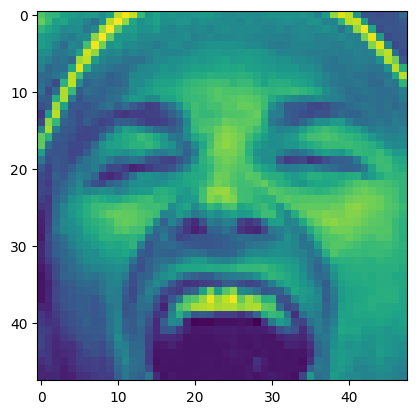

Suggestions:
“Time you enjoy wasting is not wasted time.” – Marthe Troly-Curtin
“Yesterday’s the past, tomorrow’s the future, but today is a gift. That’s why it’s called the present.” – Bil Keane
“Better three hours too soon than a minute too late.” – William Shakespeare
“You build on failure. You use it as a stepping stone. Close the door on the past. You don’t try to forget the mistakes, but you don’t dwell on it. You don’t let it have any of your energy, or any of your time, or any of your space.”-Johnny Cash
“To be kind to all, to like many and love a few, to be needed and wanted by those we love, is certainly the nearest we can come to happiness.” —Mary Stuart
"Some cause happiness wherever they go; others whenever they go.” —Oscar Wilde
“Happiness is not in the mere possession of money; it lies in the joy of achievement, in the thrill of creative effort.” —Franklin D. Roosevelt
“It’s been my experience that you can nearly always enjoy things if you make up your mind firmly that y

In [ ]:
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Define paths for text files corresponding to each emotion
anger_text_path = "/content/anger.txt"
fear_text_path = "/content/fear.txt"
sadness_text_path = "/content/sadness.txt"
joy_text_path = "/content/joy.txt"
neutral_text_path = "/content/neutral.txt"

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
  label = line.split(",")[1]
  y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
  text_file_path = anger_text_path
elif predicted_emotion == "fear":
  text_file_path = fear_text_path
elif predicted_emotion == "sadness":
  text_file_path = sadness_text_path
elif predicted_emotion == "joy":
  text_file_path = joy_text_path
else:
  text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
  print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
  print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
  print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
  print("Text data path:", joy_text_path)
else:
  print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
  with open(text_file_path, "r") as f:
    text_content = f.read()

  # Print the corresponding text file content
  print("Suggestions:")
  print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")


## Contextual Understanding: Sarcasm and Irony

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: Iwon fifty million
Predicted emotion: joy
Text data path: /content/joy.txt
Image data path: /content/drive/MyDrive/archive (3)/test/joy/im530.png


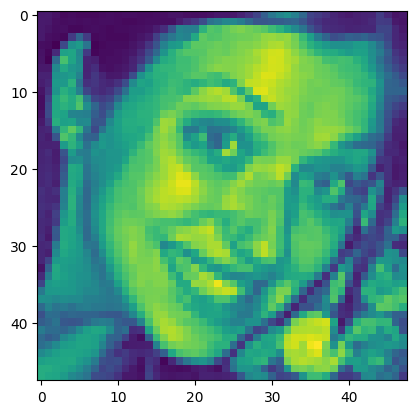

Suggestions:
Books:
"The House in the Cerulean Sea" by T.J. Klune: This heartwarming fantasy novel tells the story of Linus Baker, a caseworker who is sent to investigate a remote orphanage that houses six magical children. Linus quickly learns that the children are not dangerous and that the orphanage is a place of love and acceptance. 
"Eleanor Oliphant is Completely Fine" by Gail Honeyman: This charming novel tells the story of Eleanor Oliphant, a socially awkward and reclusive woman who learns to open up to others and find joy in life. "A Man Called Ove" by Fredrik Backman: This heartwarming novel tells the story of Ove, a grumpy old man who learns to let go of his anger and embrace life after he befriends a young family who moves in next door. 
"The Secret Life of Bees" by Sue Monk Kidd: This historical fiction novel tells the story of Lily Owens, a young girl who runs away from home in 1964 and finds refuge with a trio of black beekeepers. 
"The Book Thief" by Markus Zusak: This 

In [ ]:
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Define paths for text files corresponding to each emotion
anger_text_path = "/content/anger.txt"
fear_text_path = "/content/fear.txt"
sadness_text_path = "/content/sadness.txt"
joy_text_path = "/content/joy.txt"
neutral_text_path = "/content/neutral.txt"

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Analyze surrounding text to identify sarcasm or irony

# Detect sarcasm using linguistic cues
if compound_sentiment > 0 and 'but' in user_input:
    print("Potential sarcasm detected")

# Detect irony using contextual information
if 'opposite' in user_input and compound_sentiment < 0:
    print("Possible irony detected")

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
    text_file_path = joy_text_path
else:
    text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
    print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
    print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
    print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
    print("Text data path:", joy_text_path)
else:
    print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
     with open(text_file_path, "r") as f:
          text_content = f.read()

  # Print the corresponding text file content
print("Suggestions:")
print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")


## Multilingual Support

In [ ]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=6425a9b23c01b139e9faf0f0ecfcbf9287e83c4570f0c351771d1fb41a138ff2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15717 sha256=5d8642f377e997266efc11d103490279794a6757e141765675dfe4d29a861612
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
pip install googletrans==3.1.0a0


  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16351 sha256=95c578a50e210269ecb13c046ac4099653d34805e369646ec0a17b60ec6e7ccd
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: Ich habe meinen Lieblingsstift verloren, aber er ist auch besser
Detected language: de
Predicted emotion: sadness
Potential sarcasm detected
Text data path: /content/sadness.txt
Image data path: /content/drive/MyDrive/archive (3)/test/sadness/im526.png


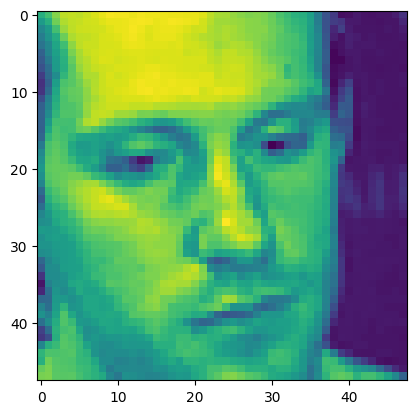

Suggestions:
Books:
"The Perks of Being a Wallflower" by Stephen Chbosky: This coming-of-age novel tells the story of Charlie, a shy and introverted teenager who struggles with depression and anxiety. The novel is full of humor and heart, and it offers a hopeful message about finding happiness even in the darkest of times. 
"The Happiness Project" by Gretchen Rubin: This self-help book outlines a plan for creating more happiness in your life. Rubin identifies six key areas of life that contribute to happiness: relationships, work, leisure, physical health, personal growth, and giving to others. She then provides practical tips and strategies for improving each of these areas. 
"The Power of Now" by Eckhart Tolle: This spiritual book teaches the reader how to live in the present moment and let go of negative thoughts and emotions. Tolle believes that true happiness comes from being present and accepting the present moment, rather than dwelling on the past or worrying about the future. 


In [ ]:
import os
import random
import langdetect
import googletrans
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define paths for text files corresponding to each emotion and language
emotion_text_paths = {
    "anger": {"en": "/content/anger_en.txt", "es": "/content/anger_es.txt"},
    "fear": {"en": "/content/fear_en.txt", "es": "/content/fear_es.txt"},
    "sadness": {"en": "/content/sadness_en.txt", "es": "/content/sadness_es.txt"},
    "joy": {"en": "/content/joy_en.txt", "es": "/content/joy_es.txt"},
    "neutral": {"en": "/content/neutral_en.txt", "es": "/content/neutral_es.txt"},
}

# Define the base path for image folders corresponding to each emotion and language
image_base_paths = {
    "anger": {"en": "/content/drive/MyDrive/archive (3)/test/anger_en", "es": "/content/drive/MyDrive/archive (3)/test/anger_es"},
    "fear": {"en": "/content/drive/MyDrive/archive (3)/test/fear_en", "es": "/content/drive/MyDrive/archive (3)/test/fear_es"},
    "sadness": {"en": "/content/drive/MyDrive/archive (3)/test/sadness_en", "es": "/content/drive/MyDrive/archive (3)/test/sadness_es"},
    "joy": {"en": "/content/drive/MyDrive/archive (3)/test/joy_en", "es": "/content/drive/MyDrive/archive (3)/test/joy_es"},
    "neutral": {"en": "/content/drive/MyDrive/archive (3)/test/neutral_en", "es": "/content/drive/MyDrive/archive (3)/test/neutral_es"},
}

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Detect language of the user input
detected_language = langdetect.detect(user_input)
print("Detected language:", detected_language)

# Translate the user input into English if the detected language is not English
if detected_language != 'en':
    translator = googletrans.Translator()
    translated_text = translator.translate(user_input, dest='en').text
    user_input = translated_text

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Get the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Analyze surrounding text to identify sarcasm or irony

# Detect sarcasm using linguistic cues
if compound_sentiment > 0 and 'but' in user_input:
    print("Potential sarcasm detected")

# Detect irony using contextual information
if 'opposite' in user_input and compound_sentiment < 0:
    print("Possible irony detected")

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
    text_file_path = joy_text_path
else:
    text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
    print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
    print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
    print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
    print("Text data path:", joy_text_path)
else:
    print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()


# Read the corresponding text file if available
if text_file_path:
     with open(text_file_path, "r") as f:
          text_content = f.read()

  # Print the corresponding text file content
print("Suggestions:")
print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")

In [ ]:
import os
import random
import langdetect
import googletrans
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define paths for text files corresponding to each emotion and language
emotion_text_paths = {
    "anger": {"en": "/content/anger_en.txt", "es": "/content/anger_es.txt"},
    "fear": {"en": "/content/fear_en.txt", "es": "/content/fear_es.txt"},
    "sadness": {"en": "/content/sadness_en.txt", "es": "/content/sadness_es.txt"},
    "joy": {"en": "/content/joy_en.txt", "es": "/content/joy_es.txt"},
    "neutral": {"en": "/content/neutral_en.txt", "es": "/content/neutral_es.txt"},
}

# Define the base path for image folders corresponding to each emotion and language
image_base_paths = {
    "anger": {"en": "/content/drive/MyDrive/archive (3)/test/anger_en", "es": "/content/drive/MyDrive/archive (3)/test/anger_es"},
    "fear": {"en": "/content/drive/MyDrive/archive (3)/test/fear_en", "es": "/content/drive/MyDrive/archive (3)/test/fear_es"},
    "sadness": {"en": "/content/drive/MyDrive/archive (3)/test/sadness_en", "es": "/content/drive/MyDrive/archive (3)/test/sadness_es"},
    "joy": {"en": "/content/drive/MyDrive/archive (3)/test/joy_en", "es": "/content/drive/MyDrive/archive (3)/test/joy_es"},
    "neutral": {"en": "/content/drive/MyDrive/archive (3)/test/neutral_en", "es": "/content/drive/MyDrive/archive (3)/test/neutral_es"},
}

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Detect language of the user input
detected_language = langdetect.detect(user_input)
print("Detected language:", detected_language)

# Translate the user input into English if the detected language is not English
if detected_language != 'en':
    translator = googletrans.Translator()
    translated_text = translator.translate(user_input, dest='en').text
    user_input = translated_text

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Get the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Analyze surrounding text to identify sarcasm or irony

# Detect sarcasm using linguistic cues
if compound_sentiment > 0 and 'but' in user_input:
    print("Potential sarcasm detected")

# Detect irony using contextual information
if 'opposite' in user_input and compound_sentiment < 0:
    print("Possible irony detected")

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
    text_file_path = joy_text_path
else:
    text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
    print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
    print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
    print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
    print("Text data path:", joy_text_path)
else:
    print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()



# Read the corresponding text file if available
if text_file_path:
     with open(text_file_path, "r") as f:
          text_content = f.read()

  # Print the corresponding text file content
print("Suggestions:")
print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: Horror
Detected language: en
Predicted emotion: fear


NameError: ignored

## Face Recognition-Multi Model

In [ ]:
pip install face-recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=60e98633ff690dd60462844595ae8008c9cc5e4d669c5295936bb1880f5044f6
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
pip install opencv-python


In [ ]:
pip install opencv-python-headless

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter the text: I won fifty million
Detected language: en
Predicted emotion: joy
Text data path: /content/joy.txt
Image data path: /content/drive/MyDrive/archive (3)/test/joy/im1712.png


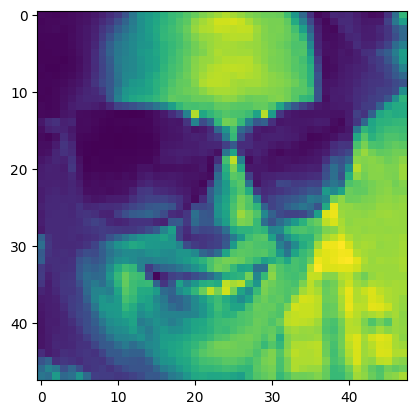

Suggestions:
Books:
"The House in the Cerulean Sea" by T.J. Klune: This heartwarming fantasy novel tells the story of Linus Baker, a caseworker who is sent to investigate a remote orphanage that houses six magical children. Linus quickly learns that the children are not dangerous and that the orphanage is a place of love and acceptance. 
"Eleanor Oliphant is Completely Fine" by Gail Honeyman: This charming novel tells the story of Eleanor Oliphant, a socially awkward and reclusive woman who learns to open up to others and find joy in life. "A Man Called Ove" by Fredrik Backman: This heartwarming novel tells the story of Ove, a grumpy old man who learns to let go of his anger and embrace life after he befriends a young family who moves in next door. 
"The Secret Life of Bees" by Sue Monk Kidd: This historical fiction novel tells the story of Lily Owens, a young girl who runs away from home in 1964 and finds refuge with a trio of black beekeepers. 
"The Book Thief" by Markus Zusak: This 

In [ ]:
import os
import random
import langdetect
import googletrans
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Define paths for text files corresponding to each emotion and language
emotion_text_paths = {
    "anger": {"en": "/content/anger_en.txt", "es": "/content/anger_es.txt"},
    "fear": {"en": "/content/fear_en.txt", "es": "/content/fear_es.txt"},
    "sadness": {"en": "/content/sadness_en.txt", "es": "/content/sadness_es.txt"},
    "joy": {"en": "/content/joy_en.txt", "es": "/content/joy_es.txt"},
    "neutral": {"en": "/content/neutral_en.txt", "es": "/content/neutral_es.txt"},
}

# Define the base path for image folders corresponding to each emotion and language
image_base_paths = {
    "anger": {"en": "/content/drive/MyDrive/archive (3)/test/anger_en", "es": "/content/drive/MyDrive/archive (3)/test/anger_es"},
    "fear": {"en": "/content/drive/MyDrive/archive (3)/test/fear_en", "es": "/content/drive/MyDrive/archive (3)/test/fear_es"},
    "sadness": {"en": "/content/drive/MyDrive/archive (3)/test/sadness_en", "es": "/content/drive/MyDrive/archive (3)/test/sadness_es"},
    "joy": {"en": "/content/drive/MyDrive/archive (3)/test/joy_en", "es": "/content/drive/MyDrive/archive (3)/test/joy_es"},
    "neutral": {"en": "/content/drive/MyDrive/archive (3)/test/neutral_en", "es": "/content/drive/MyDrive/archive (3)/test/neutral_es"},
}

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Detect language of the user input
detected_language = langdetect.detect(user_input)
print("Detected language:", detected_language)

# Translate the user input into English if the detected language is not English
if detected_language != 'en':
    translator = googletrans.Translator()
    translated_text = translator.translate(user_input, dest='en').text
    user_input = translated_text

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Get the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Analyze surrounding text to identify sarcasm or irony

# Detect sarcasm using linguistic cues
if compound_sentiment > 0 and 'but' in user_input:
    print("Potential sarcasm detected")

# Detect irony using contextual information
if 'opposite' in user_input and compound_sentiment < 0:
    print("Possible irony detected")

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
    text_file_path = joy_text_path
else:
    text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
    print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
    print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
    print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
    print("Text data path:", joy_text_path)
else:
    print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()


# Read the corresponding text file if available
if text_file_path:
     with open(text_file_path, "r") as f:
          text_content = f.read()

  # Print the corresponding text file content
print("Suggestions:")
print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")



In [ ]:
import os
import random
import langdetect
import googletrans
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import face_recognition

# Define paths for text files corresponding to each emotion and language
emotion_text_paths = {
    "anger": {"en": "/content/anger_en.txt", "es": "/content/anger_es.txt"},
    "fear": {"en": "/content/fear_en.txt", "es": "/content/fear_es.txt"},
    "sadness": {"en": "/content/sadness_en.txt", "es": "/content/sadness_es.txt"},
    "joy": {"en": "/content/joy_en.txt", "es": "/content/joy_es.txt"},
    "neutral": {"en": "/content/neutral_en.txt", "es": "/content/neutral_es.txt"},
}

# Define the base path for image folders corresponding to each emotion and language
image_base_paths = {
    "anger": {"en": "/content/drive/MyDrive/archive (3)/test/anger_en", "es": "/content/drive/MyDrive/archive (3)/test/anger_es"},
    "fear": {"en": "/content/drive/MyDrive/archive (3)/test/fear_en", "es": "/content/drive/MyDrive/archive (3)/test/fear_es"},
    "sadness": {"en": "/content/drive/MyDrive/archive (3)/test/sadness_en", "es": "/content/drive/MyDrive/archive (3)/test/sadness_es"},
    "joy": {"en": "/content/drive/MyDrive/archive (3)/test/joy_en", "es": "/content/drive/MyDrive/archive (3)/test/joy_es"},
    "neutral": {"en": "/content/drive/MyDrive/archive (3)/test/neutral_en", "es": "/content/drive/MyDrive/archive (3)/test/neutral_es"},
}

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Initialize face recognizer
face_recognizer = face_recognition.face_recognition_model_v2.FaceRecognitionModel()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Detect language of the user input
detected_language = langdetect.detect(user_input)
print("Detected language:", detected_language)

# Translate the user input into English if the detected language is not English
if detected_language != 'en':
    translator = googletrans.Translator()
    translated_text = translator.translate(user_input, dest='en').text
    user_input = translated_text

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Predict the emotion of the input text
y_pred_new = clf.predict(X_new)

# Get the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']


# Analyze surrounding text to identify sarcasm or irony

# Detect sarcasm using linguistic cues
if compound_sentiment > 0 and 'but' in user_input:
    print("Potential sarcasm detected")

# Detect irony using contextual information
if 'opposite' in user_input and compound_sentiment < 0:
    print("Possible irony detected")

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
    text_file_path = joy_text_path
else:
    text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
    print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
    print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
    print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
    print("Text data path:", joy_text_path)
else:
    print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
     with open(text_file_path, "r") as f:
          text_content = f.read()

  # Print the corresponding text file content
print("Suggestions:")
print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")





RuntimeError: ignored

## With NER

In [ ]:
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import spacy

# Define paths for text files corresponding to each emotion
anger_text_path = "/content/anger.txt"
fear_text_path = "/content/fear.txt"
sadness_text_path = "/content/sadness.txt"
joy_text_path = "/content/joy.txt"
neutral_text_path = "/content/neutral.txt"

# Define the base path for image folders
image_base_path = "/content/drive/MyDrive/archive (3)/test"

# Load the text data
text_data = open("/content/emotion_dataset.csv", "r").readlines()

# Extract features from the text data
vectorizer = TfidfVectorizer()
ner = spacy.load('en_core_web_sm')

# Extract features from the text data and include NER entities
X = []
for line in text_data:
    text = line.split(",")[0]
    doc = ner(text)
    entities = [entity.ent_type_ for entity in doc.ents]
    features = vectorizer.transform([text])
    ner_features = vectorizer.transform([" ".join(entities)])
    combined_features = hstack([features, ner_features])
    X.append(combined_features)

X = np.array(X)

# Define the labels
y = []
for line in text_data:
    label = line.split(",")[1]
    y.append(label)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a logistic regression model
clf = LogisticRegression()

# Train the model to the training data
clf.fit(X_train, y_train)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Prompt the user to enter text
user_input = input("Enter the text: ")

# Transform the user input into a TF-IDF vector
X_new = vectorizer.transform([user_input])

# Extract NER entities from the user input
doc = ner(user_input)
entities = [entity.ent_type_ for entity in doc.ents]
ner_features = vectorizer.transform([" ".join(entities)])
combined_features = hstack([X_new, ner_features])

# Predict the emotion of the input text
y_pred_new = clf.predict(combined_features)

# Print the predicted emotion
predicted_emotion = y_pred_new[0]
print("Predicted emotion:", predicted_emotion)

# Perform sentiment analysis
sentiment = sentiment_analyzer.polarity_scores(user_input)
compound_sentiment = sentiment['compound']

# Determine the corresponding text file based on the predicted emotion
text_file_path = None
if predicted_emotion == "anger":
    text_file_path = anger_text_path
elif predicted_emotion == "fear":
    text_file_path = fear_text_path
elif predicted_emotion == "sadness":
    text_file_path = sadness_text_path
elif predicted_emotion == "joy":
  text_file_path = joy_text_path
else:
  text_file_path = neutral_text_path

# Find the corresponding image folder path based on the predicted emotion
image_folder_path = os.path.join(image_base_path, predicted_emotion)

# Select a random image file from the corresponding folder
image_files = os.listdir(image_folder_path)
random_image_file = image_files[random.randint(0, len(image_files) - 1)]
image_file_path = os.path.join(image_folder_path, random_image_file)

# Print the corresponding data paths
if predicted_emotion == "anger":
  print("Text data path:", anger_text_path)
elif predicted_emotion == "fear":
  print("Text data path:", fear_text_path)
elif predicted_emotion == "sadness":
  print("Text data path:", sadness_text_path)
elif predicted_emotion == "joy":
  print("Text data path:", joy_text_path)
else:
  print("Text data path:", neutral_text_path)

print("Image data path:", image_file_path)

# Display the image file
plt.imshow(plt.imread(image_file_path))
plt.show()

# Read the corresponding text file if available
if text_file_path:
  with open(text_file_path, "r") as f:
    text_content = f.read()

  # Print the corresponding text file content
  print("Suggestions:")
  print(text_content)

# Personalized Recommendations
print("\nPersonalized Recommendations:")

# Based on the predicted emotion and sentiment, provide personalized recommendations
if predicted_emotion == "anger":
    if compound_sentiment < 0:
        print("- Identify the source of your anger and address it in a healthy way.")
        print("- Take some time for yourself to calm down before taking any action.")
        print("- Express your anger in a constructive way, such as through exercise or journaling.")

    elif compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your anger.")

    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "fear":
    if compound_sentiment < 0:
        print("- Identify the source of your fear and face it head-on.")
        print("- Talk to someone you trust about your fears.")
        print("- Practice relaxation techniques to help manage your anxiety.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "sadness":
    if compound_sentiment < 0:
        print("- Practice relaxation techniques like deep breathing or meditation.")
        print("- Engage in activities that bring you joy.")
        print("- Seek support from friends, family, or a therapist.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
elif predicted_emotion == "joy":
    if compound_sentiment > 0:
        print("- Continue to engage in activities that bring you happiness.")
        print("- Share your positive experiences with others.")
        print("- Practice gratitude for the good things in your life.")
    else:
        print("- Engage in activities that promote mindfulness and self-awareness.")
        print("- Practice gratitude for the good things in your life.")
        print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")
else:
    print("- Engage in activities that promote mindfulness and self-awareness.")
    print("- Practice gratitude for the good things in your life.")
    print("- Seek support from friends, family, or a therapist if you are struggling to cope with your emotions.")




## Speech

In [ ]:
pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 26.8 MB/s eta 0:00:00


In [ ]:
pip install pyaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 542.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


ValueError: ignored

In [ ]:
import speech_recognition as sr
import pyaudio


ModuleNotFoundError: ignored

ValueError: ignored